In [34]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

TEST_IMAGE_PATH = "../data/test4.jpg"
TEST_IMAGE = cv2.imread(TEST_IMAGE_PATH)
TEST_IMAGE = cv2.cvtColor(TEST_IMAGE, cv2.COLOR_BGR2RGB)

# Load Test iamges

In [35]:
print(f"""Image path: {TEST_IMAGE_PATH}
Image shape: {TEST_IMAGE.shape}""")

Image path: ../data/test4.jpg
Image shape: (1098, 564, 3)


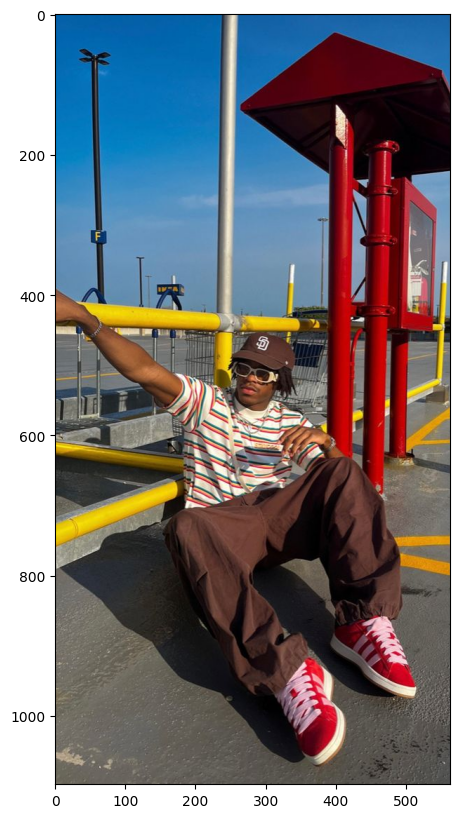

In [36]:
plt.figure(figsize=(10, 10))
plt.imshow(TEST_IMAGE)
plt.show()

# Model Initalize

In [37]:
from torchvision.transforms import transforms
from PIL import Image

import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torch
import utils
import time
import cv2

In [38]:
transform = transforms.Compose([
    transforms.ToTensor(),
])

In [39]:
model = torchvision.models.detection.keypointrcnn_resnet50_fpn(pretrained=True, num_keypoints=17,)
device = torch.device('cpu')
model.to(device).eval()

KeypointRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(640, 672, 704, 736, 768, 800), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.

In [40]:
orig_image = TEST_IMAGE.copy()
orig_image = np.array(orig_image, dtype=np.float32) / 255.0

In [41]:
test_image = transform(TEST_IMAGE)
test_image = test_image.unsqueeze(0).to(device)

In [42]:
start_time = time.time()
with torch.no_grad():
    predictions = model(test_image)
print("Time taken: {:.2f} seconds".format(time.time() - start_time))

print(predictions)

Time taken: 2.09 seconds
[{'boxes': tensor([[  16.1158,  388.7214,  504.4808,  952.8976],
        [   1.6382,  392.8176,  404.7732,  713.8669],
        [ 211.0253,  453.4133,  401.3032,  672.6726],
        [ 130.6086,  570.1920,  532.1467, 1031.3690],
        [ 193.8413,  443.9243,  503.4128,  880.6211]]), 'labels': tensor([1, 1, 1, 1, 1]), 'scores': tensor([0.9934, 0.9439, 0.2911, 0.0887, 0.0543]), 'keypoints': tensor([[[278.4164, 520.0880,   1.0000],
         [295.7109, 511.0282,   1.0000],
         [268.5338, 506.9102,   1.0000],
         [319.5939, 521.7352,   1.0000],
         [252.8864, 508.5573,   1.0000],
         [341.8297, 581.8591,   1.0000],
         [215.0031, 557.9742,   1.0000],
         [420.8905, 660.9261,   1.0000],
         [128.5303, 508.5573,   1.0000],
         [383.8307, 609.8620,   1.0000],
         [ 50.2931, 437.7265,   1.0000],
         [323.7116, 716.9319,   1.0000],
         [243.0037, 730.1097,   1.0000],
         [410.1844, 651.0427,   1.0000],
         [

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Time taken: 2.17 seconds


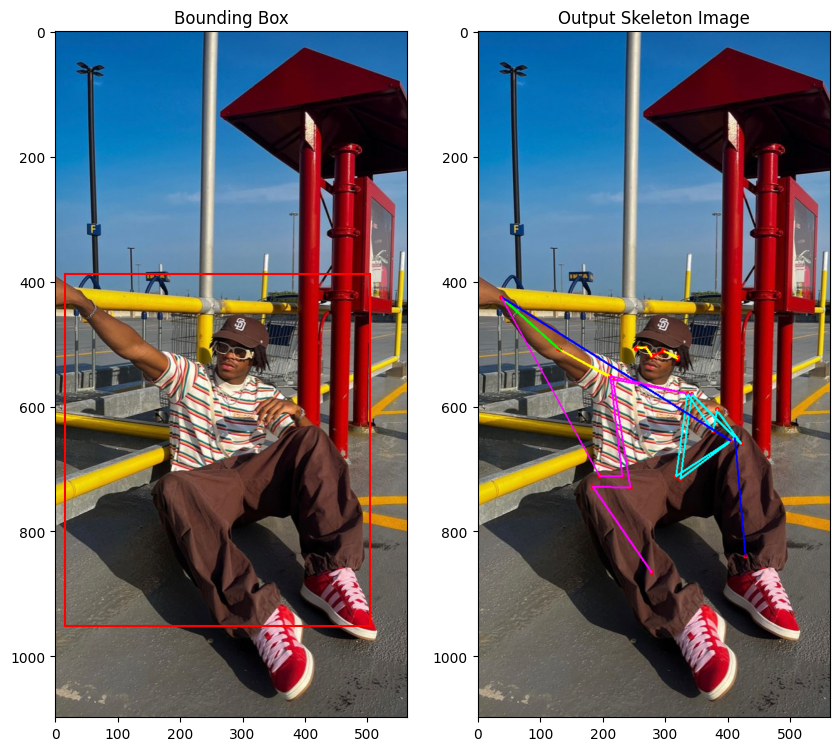

In [43]:
boxes = predictions[0]['boxes'].cpu().numpy().astype(np.int32)

start_time = time.time()
with torch.no_grad():
    predictions = model(test_image)
print("Time taken: {:.2f} seconds".format(time.time() - start_time))

output_image = utils.draw_keypoints(predictions, orig_image)

plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.title('Bounding Box')
plt.imshow(TEST_IMAGE)
plt.plot([boxes[0][0], boxes[0][2]], [boxes[0][1], boxes[0][1]], color='red')
plt.plot([boxes[0][0], boxes[0][2]], [boxes[0][3], boxes[0][3]], color='red')
plt.plot([boxes[0][0], boxes[0][0]], [boxes[0][1], boxes[0][3]], color='red')
plt.plot([boxes[0][2], boxes[0][2]], [boxes[0][1], boxes[0][3]], color='red')

plt.subplot(1, 2, 2)
plt.title('Output Skeleton Image')
plt.imshow(output_image)

plt.show()